# Problem 1: Dataset Overview

In [1]:

import pandas as pd

ames_housing_df = pd.read_csv('dataset.csv')


In [4]:
# 1.1 Load the Ames Housing dataset into a Pandas DataFrame and Display the First 5 Rows

ames_housing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# 1.2 Determine the Number of Columns and Understand the Information Contained
num_columns = ames_housing_df.shape[1]
print(f"Number of columns: {num_columns}")


ames_housing_df.info()


Number of columns: 81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [16]:
# 1.3 Identify and Count Missing Values in Each Column

null_tf = ames_housing_df.isnull().sum()
print(null_tf[null_tf > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
# 1.4 Top 5 neighborhoods with the highest average SalePrice

high_n = ames_housing_df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head(5)
print("high_housings: ", high_n)


high_housings:  Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64


In [11]:
#1.5  Recalculate the proportion of houses with a swimming pool
houses_with_pool_proportion = (ames_housing_df['PoolArea'] > 0).mean()

houses_with_pool_proportion


np.float64(0.004794520547945206)

In [ ]:
# 1.6 Relationship between OverallQual and SalePrice

# קורלציה בין OverallQual ו-SalePrice
correlation = ames_housing_df['OverallQual'].corr(ames_housing_df['SalePrice'])
print(f"Correlation between OverallQual and SalePrice: {correlation:.4f}")


Correlation between OverallQual and SalePrice: 0.7910


## insights


1.6 
There is a significant positive relationship between the overall quality (OverallQual) of a house and its sale price (SalePrice), with a correlation coefficient of approximately 0.79. This indicates that as the overall quality of a house increases, its sale price tends to increase as well, suggesting a strong linear relationship between these two variables.

# Problem 2: Data Access and Manipulation

In [8]:
# 2.1 Information on OverallQual and OverallCond for houses built in 2000 and after


houses_2000_onwards = ames_housing_df[ames_housing_df['YearBuilt'] >= 2000][['OverallQual', 'OverallCond']]
houses_2000_onwards


,OverallQual,OverallCond
0,7,5
2,7,5
4,8,5
6,8,5
11,9,5
...,...,...
1444,7,5
1451,8,5
1452,5,5
1453,5,5


In [9]:
# 2.2 Average LotArea and SalePrice in different neighborhoods

avg_lotarea_saleprice_by_neighborhood = ames_housing_df.groupby('Neighborhood')[['LotArea', 'SalePrice']].mean()
avg_lotarea_saleprice_by_neighborhood





,LotArea,SalePrice
Neighborhood,,
Blmngtn,3398.176471,194870.882353
Blueste,1625.000000,137500.000000
BrDale,1801.000000,104493.750000
BrkSide,7360.413793,124834.051724
ClearCr,30875.750000,212565.428571
CollgCr,9619.146667,197965.773333
Crawfor,11809.686275,210624.725490
Edwards,10218.650000,128219.700000
Gilbert,11379.151899,192854.506329


In [7]:
# 2.3 Details of the house with the highest sale price

# Find the row with the highest SalePrice with details so we use loc[].idmax():
highest_sale_row = ames_housing_df.loc[ames_housing_df['SalePrice'].idxmax()]

print("Details of the house with the highest sale price:")
print(f"the highest row:{highest_sale_row}")



Details of the house with the highest sale price:
the highest row:Id                  692
MSSubClass           60
MSZoning             RL
LotFrontage       104.0
LotArea           21535
                  ...  
MoSold                1
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        755000
Name: 691, Length: 81, dtype: object


In [ ]:
# 2.4 Houses with more than 2 fireplaces and the effect of the number of fireplaces on sale price

houses_with_fireplaces = ames_housing_df[ames_housing_df['Fireplaces'] > 2]
fireplace_effect = ames_housing_df.groupby('Fireplaces')['SalePrice'].mean()
fireplace_effect
# כדי להציג את מספר הקמינים כעמודה ולא כאינדקס, אפשר לאפס את האינדקס:
fireplace_effect_reset = fireplace_effect.reset_index()
fireplace_effect_reset


,Fireplaces,SalePrice
0,0,141331.482609
1,1,211843.909231
2,2,240588.539130
3,3,252000.000000


In [8]:
# 2.5 how many Houses with a garage area larger than 800 square feet ? and their average sale price

#filter only houses above 800 square:
large_garage = ames_housing_df[ames_housing_df['GarageArea'] > 800]


#number of houses =number of rows of the filtaration :
num_large_garage = large_garage.shape[0]


avg_sale_price_large_garage = large_garage['SalePrice'].mean()
print(avg_sale_price_large_garage)

305283.77192982455


## Insights


 2.4 The effect of the number of fireplaces on the mean sale price:
 As the number of fireplaces increases, the mean sale price of houses also tends to increase.
 This suggests that having more fireplaces is associated with higher property values in the dataset.

# Problem 3: Data Cleaning

In [6]:
#3.2 Identify columns with more than 80% missing values for informational purposes

nan=ames_housing_df.isnull().mean()>0.8 
col_nul=ames_housing_df.columns[nan]# names of columns with the missing data after filtraion
print(col_nul)

# 3.3 Identify columns with a single unique value-calculate how many diffrent values in each column ,if its eaqual to 1 then most of the value are the same or in diffrent word it has single unique value

single_unique_col = ames_housing_df.columns[ames_housing_df.nunique() == 1]

# Remove columns with a single unique value from the DataFrame-drop only columns with unique values not rows,thats why we add colomns= single_unique_col
ames_housing_df_reduced = ames_housing_df.drop(columns=single_unique_col)



Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


## Insights

3.1 How to handle missing values in Alley:
Fill with 'NoAlley' – if NaN means no alley access.

Keep as NaN – if your model can handle missing values.

Drop the column – if it has too many missing values and low importance.

Fill with mode – not ideal here; use only if NaNs truly mean "unknown".

 Useful tools:

df['Alley'].isnull().sum() – count missing values

fillna('NoAlley') – fill missing

drop('Alley') – remove the column



# Problem 4: Aggregation and Grouping

In [8]:
# 4.1 Median sale price of houses by building type
sale_price_bldgtype = ames_housing_df.groupby('BldgType')['SalePrice'].median().sort_values(ascending=True)
print(sale_price_bldgtype)

# 4.2 Year with the highest number of houses sold

year_numbhouses = ames_housing_df['YrSold'].value_counts()
print(year_numbhouses)

idmax_year=year_numbhouses.idxmax()
print(idmax_year)

high_sale_house=year_numbhouses.max()
print(high_sale_house)


# 4.3 Average sale price by neighborhood and building type


sale_price_by_neighborhood_bldgtype = ames_housing_df.groupby(['Neighborhood', 'BldgType'])['SalePrice'].mean()
print(sale_price_bldgtype)




# 4.4 Year with the highest and lowest number of sales

year_numbhouses2 = ames_housing_df['YrSold'].value_counts()
print(year_numbhouses2)
year_lowest_sales = year_numbhouses2.idxmin()
lowest_sales_count = year_numbhouses2.min()
print(f"the lowest sales year:{year_lowest_sales} and the lowes sale count{lowest_sales_count}")


BldgType
2fmCon    127500.0
Duplex    135980.0
Twnhs     137500.0
1Fam      167900.0
TwnhsE    172200.0
Name: SalePrice, dtype: float64
YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64
2009
338
BldgType
2fmCon    127500.0
Duplex    135980.0
Twnhs     137500.0
1Fam      167900.0
TwnhsE    172200.0
Name: SalePrice, dtype: float64
YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64
the lowest sales year:2010 and the lowes sale count175


## Insights

#4.1 TwnhsE (Townhouse End Unit) and 1Fam (Single-Family Detached) homes tend to have higher median sale prices.

In contrast, Duplex, 2fmCon (Two-Family Conversion), and Twnhs (Townhouse Inside Unit) generally sell for lower prices.
The building type has a noticeable impact on house sale prices, likely due to differences in lot size, privacy, living space, and market demand.

#4.4The decrease in sales from 2009 to 2010 might indicate a cooling off in the housing market or other external economic factors impacting home buying activity.

# Problem 5: Deep Dive with Pivot Tables


In [20]:
# 5.1 Pivot table for OverallQual, SaleCondition, and average SalePrice
piv_qul_sale = ames_housing_df.pivot_table(values="SalePrice", index="OverallQual", columns="SaleCondition", aggfunc="mean")
print(piv_qul_sale)

# 5.2 Pivot table for OverallCond, YearBuilt, and median SalePrice

piv_qul_YrBlt = ames_housing_df.pivot_table(values="SalePrice", index="OverallCond", columns='YearBuilt', aggfunc="mean")
print(piv_qul_YrBlt)

# 5.3 Pivot table for LotArea by Neighborhood and LotConfig

piv_Nribr_lotcfg=ames_housing_df.pivot_table(values='LotArea', index='Neighborhood', columns='LotConfig', aggfunc='median')
print(piv_Nribr_lotcfg)

# 5.4 Pivot table for SalePrice trend over the years

piv_slprc_YrSd = ames_housing_df.pivot_table(values='SalePrice', index='YrSold', aggfunc='mean').sort_values(by='YrSold', ascending=True)
print(piv_slprc_YrSd)


SaleCondition        Abnorml   AdjLand         Alloca         Family  \
OverallQual                                                            
1                        NaN       NaN            NaN            NaN   
2               35311.000000       NaN            NaN            NaN   
3               72633.333333       NaN            NaN  105000.000000   
4              103009.692308   82000.0   99215.000000  107000.000000   
5              118986.864865  103500.0  128184.166667  139714.285714   
6              146433.333333  127500.0  237797.000000  126875.000000   
7              184973.800000       NaN  206300.000000  176583.333333   
8              240875.000000       NaN  359100.000000  235000.000000   
9              328900.000000       NaN            NaN            NaN   
10             745000.000000       NaN            NaN            NaN   

SaleCondition         Normal        Partial  
OverallQual                                  
1               50150.000000            NaN

## Insights

#5.1 Overall Quality Correlation: As OverallQual increases, the average sale price also increases across most sale conditions, confirming that better overall quality leads to higher sale prices.
Sale Condition Impact:

Normal and Partial sales tend to yield higher prices, especially for higher quality houses.

Abnorml, Family, and Alloca conditions typically result in lower average prices, possibly indicating distress sales or non-standard transactions.

Partial sales (often new constructions) show a notable price premium in higher quality homes.


#5.3 Cul-de-sac lots tend to be the largest:

For example, in the ClearCr neighborhood, the median lot size for CulDSac is 46,165 sq ft, compared to 13,500 sq ft for Inside lots — a significant difference.

This suggests that cul-de-sac locations are often associated with larger, perhaps more premium, properties.

Some neighborhoods consistently have small lot sizes:

For instance, neighborhoods like Blueste, BrDale, and NPkVill show very low median lot sizes, indicating high-density or lower-value housing areas.

#5.4 2007 had the highest average sale price – Reaching approximately $186,000, and the lowest average sale price-in 2008 Reaching approximately $177,400.This could reflect market stability or saturation, economic factors influencing property values, or changes in buyer preferences over these years.

# Problem 6: Visualization and Styling

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

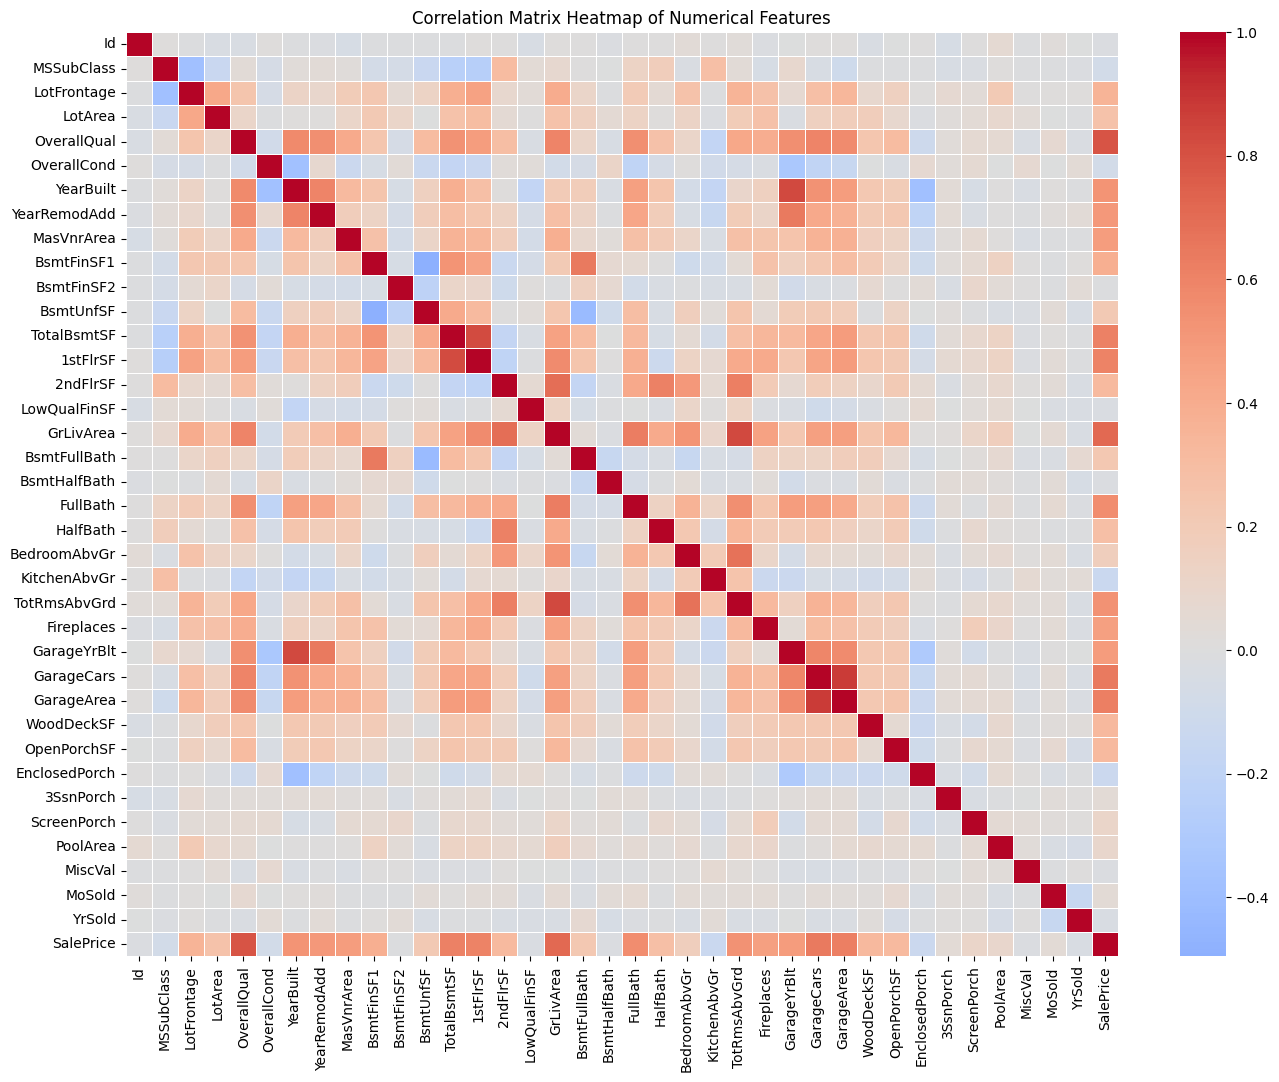

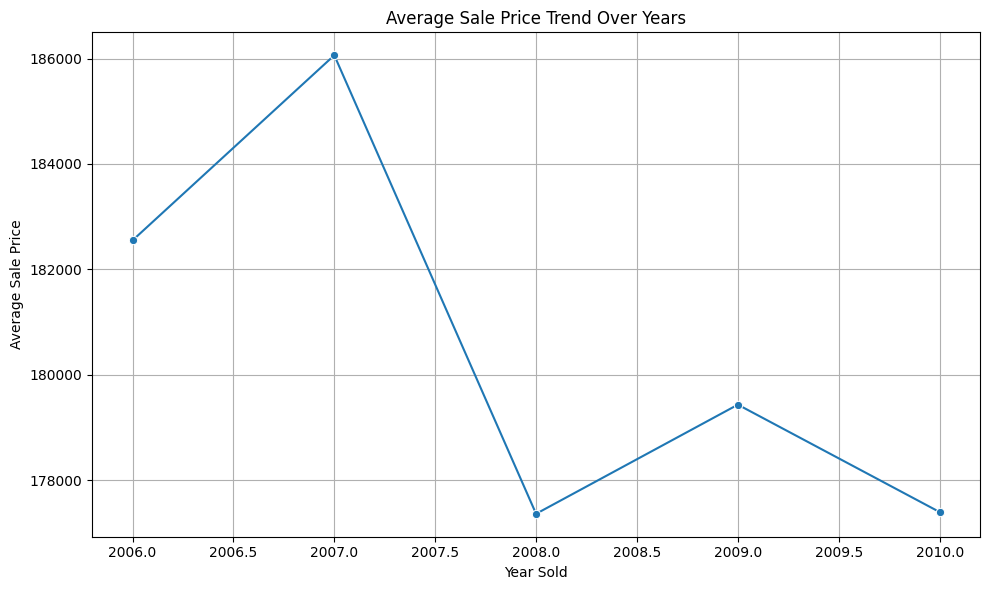

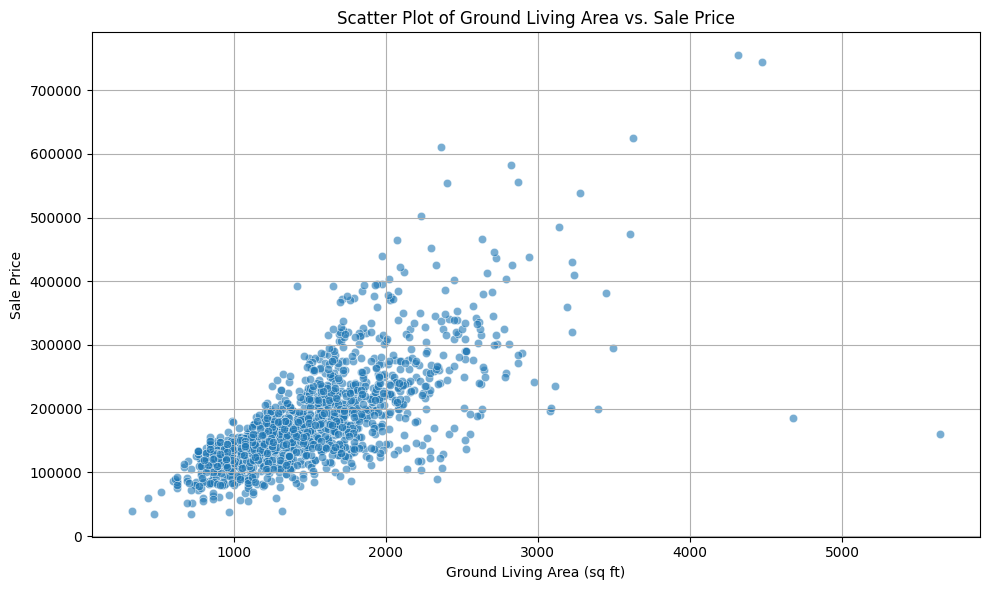

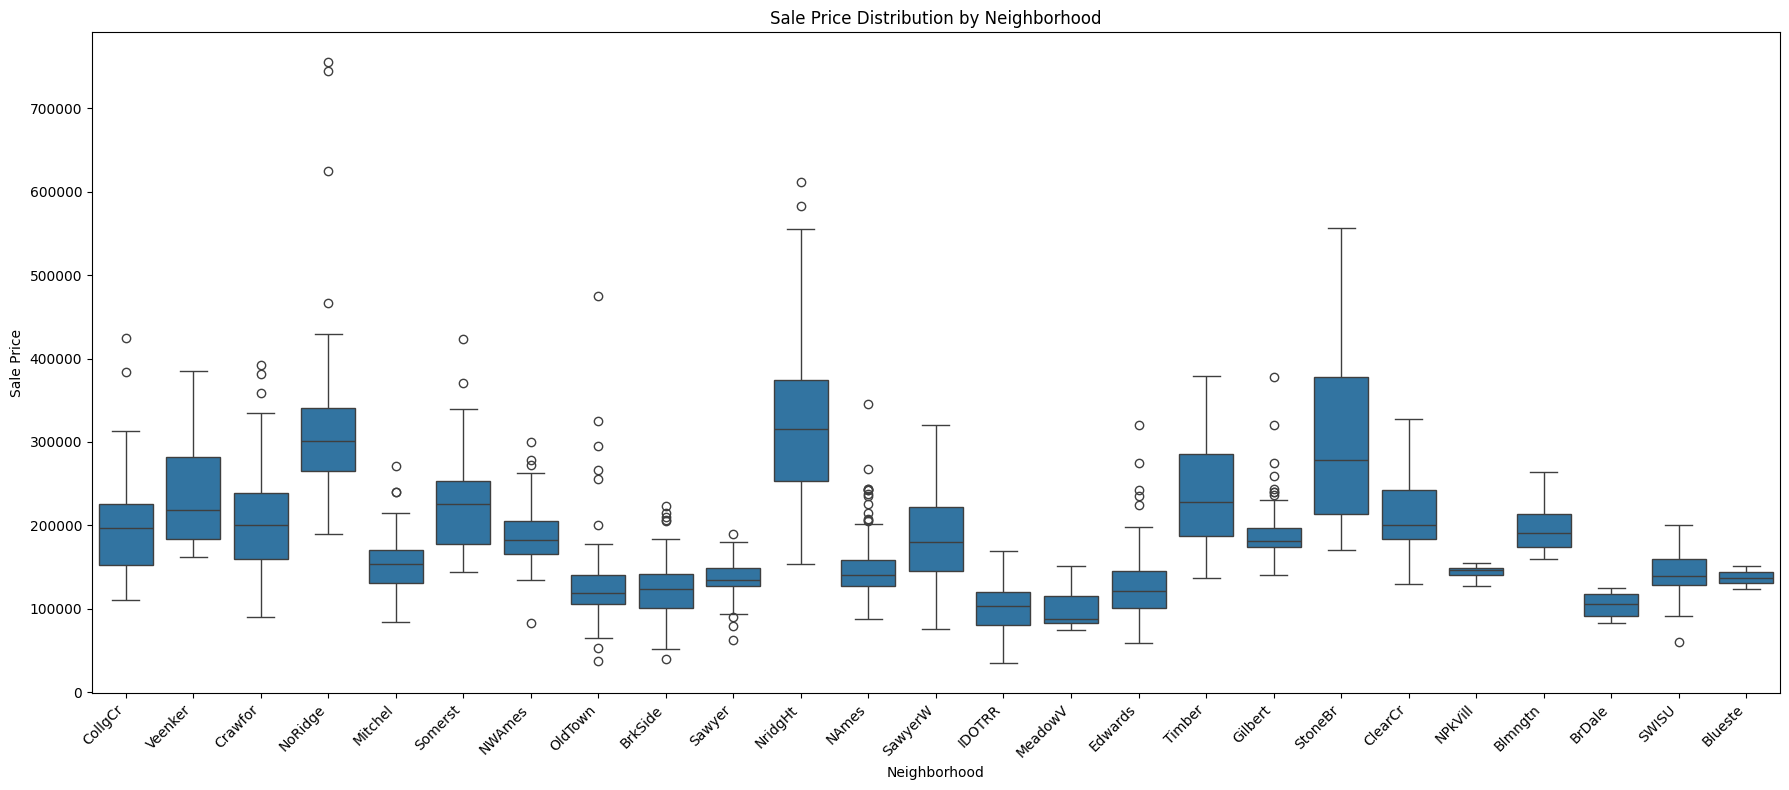

In [23]:

# 6.1 Create a correlation matrix of the numerical columns
# Compute the correlation matrix for numerical columns
corr_matrix = ames_housing_df.corr(numeric_only=True)

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()


# Visualize the correlation matrix using a heatmap


# 6.2 Visualize the trend of average sale price over the years
# Group by year and calculate average sale price
avg_price_per_year = ames_housing_df.groupby('YrSold')['SalePrice'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_per_year, x='YrSold', y='SalePrice', marker='o')
plt.title('Average Sale Price Trend Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# 6.3 Scatter plot for GrLivArea vs. SalePrice


plt.figure(figsize=(10, 6))
sns.scatterplot(data=ames_housing_df, x='GrLivArea', y='SalePrice', alpha=0.6)
plt.title('Scatter Plot of Ground Living Area vs. Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()



# 6.4 Boxplot for SalePrice in different neighborhoods

plt.figure(figsize=(18, 8))
sns.boxplot(data=ames_housing_df, x='Neighborhood', y='SalePrice')
plt.title('Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




## Insights

#6.1 he heatmap highlights that home size, garage capacity, and overall quality are key drivers of sale price, while the number of kitchens or general condition are less influential. 
This reinforces the idea that spacious, well-built homes with modern features tend to command higher prices.


#6.2 The line plot reveals moderate fluctuations in average sale prices between 2006 and 2010, without a consistent upward or downward trajectory. 
While individual years show increases or dips—likely influenced by external economic factors—the overall trend appears relatively stable, indicating that home values remained fairly steady during this period.


#6.3 # The scatter plot shows a positive correlation between ground living area and sale price.As the ground living area increases, the sale price generally increases as well.
#However, there are some outliers with large living areas but relatively lower sale prices,and vice versa. This suggests that while size is a strong factor, other features also influence price.

#6.4
The boxplot reveals substantial differences in median sale prices among neighborhoods, underscoring the strong influence of location on property values. Certain neighborhoods — likely those with premium amenities or favorable positioning — exhibit both higher median prices and broader price distributions, suggesting a diverse housing market within those areas. This visualization emphasizes that neighborhood is a key factor in determining a property's market value.










